# Linear Regression on the boston DataSet

Trying to predict the prize from 13 features.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm
import seaborn as sns
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

sns.set_style("whitegrid")
sns.set_context("poster")

# special matplotlib argument for improved plots
from matplotlib import rcParams

from sklearn.datasets import load_boston

In [2]:
###LOAD DATASET
bostonDataSet = load_boston()
print("boston_keys:" )
print(bostonDataSet.keys())
print("boston_data_shape: ")
print(bostonDataSet.data.shape)

print(bostonDataSet.feature_names)
print(bostonDataSet.DESCR)
features = bostonDataSet.data
labels = bostonDataSet.target

boston_keys:
dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
boston_data_shape: 
(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS   

In [3]:
# NORMALIZE FEATURES
mu = np.mean(features, axis=0)
sigma = np.std(features, axis=0)
features = (features - mu) / sigma

In [4]:
###SPLIT features and labels into training and test

featuers_train = features[0:400]
lables_train = labels[0:400]

features_test = features[400:]
lables_test = labels[400:]

print('data training shape: ', featuers_train.shape)
print('target training shape: ', lables_train.shape)
print('data test shape: ', features_test.shape)
print('target test shape: ', lables_test.shape)

data training shape:  (400, 13)
target training shape:  (400,)
data test shape:  (106, 13)
target test shape:  (106,)


In [5]:
# add column of ones in the first column of training set
n_training_samples = featuers_train.shape[0]
n_dim_training = featuers_train.shape[1]
featuers_train = np.reshape(np.c_[np.ones(n_training_samples), featuers_train],
                            [n_training_samples, n_dim_training + 1])
print('data training shape: ', featuers_train.shape)

data training shape:  (400, 14)


In [6]:
# here again we add column of ones in the first column of test set
n_test_samples = features_test.shape[0]
n_dim_test = features_test.shape[1]
features_test = np.reshape(np.c_[np.ones(n_test_samples), features_test], [n_test_samples, n_dim_test + 1])
print('data training shape: ', features_test.shape)


data training shape:  (106, 14)


In [7]:
# optimum solution for this model
opt = np.matmul(
    np.matmul(np.linalg.inv(np.matmul(featuers_train.transpose(), featuers_train)), featuers_train.transpose()),
    lables_train)
print(opt)

[23.28337581 -1.643388    1.0305089   0.37845963  0.43550243 -1.73595149
  3.43080791  0.07337369 -2.7237948   4.21699484 -2.59301797 -1.74926608
 -0.1178641  -3.69508319]


In [8]:
tf.reset_default_graph()
# define placeholder for computational graph
X = tf.placeholder(tf.float64, shape=(400, 14))
print(X)
y = tf.placeholder(tf.float64, shape=(400))
print(y)
# define theta hat variable
theta_hat = tf.Variable(tf.zeros(14, tf.float64))
# calculate y_hat
y_hat = tf.tensordot(X, theta_hat, 1)
# calculate error vector e (y - y_hat)
error_vec = tf.subtract(y, y_hat)
# calculate gradient vector
gradient_vec = 2 * tf.tensordot(error_vec, -X, 1)

Instructions for updating:
non-resource variables are not supported in the long term
Tensor("Placeholder:0", shape=(400, 14), dtype=float64)
Tensor("Placeholder_1:0", shape=(400,), dtype=float64)


In [9]:
# update theta_hat
alpha = 0.0001
theta_hat = theta_hat.assign(theta_hat - alpha * gradient_vec)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(1000):
        e_vec, grad_vec, t_hat = sess.run([error_vec, gradient_vec, theta_hat],
                                          feed_dict={X: featuers_train, y: lables_train})

        #print('iteration, error vec, grad vec, theta vec: ', epoch, e_vec, grad_vec, t_hat)
print('theta_hat iterative: ', t_hat)
print('theta_hat normal equations: ', opt)


theta_hat iterative:  [23.28103859 -1.63806844  1.02740806  0.36839557  0.43775806 -1.73392697
  3.43203821  0.0715952  -2.72587913  4.17194297 -2.54995215 -1.74754289
 -0.11110932 -3.69473992]
theta_hat normal equations:  [23.28337581 -1.643388    1.0305089   0.37845963  0.43550243 -1.73595149
  3.43080791  0.07337369 -2.7237948   4.21699484 -2.59301797 -1.74926608
 -0.1178641  -3.69508319]


features_test shape:  (106, 14)
t_hat shape:  (14,)


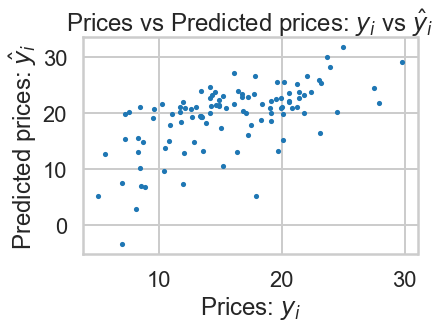

In [10]:
# fill test target and predicted target

print("features_test shape: ",features_test.shape)
print("t_hat shape: ",t_hat.shape)

plt.scatter(lables_test,np.dot(features_test, t_hat),s=10)
plt.xlabel("Prices: $y_i$")
plt.ylabel("Predicted prices: $\hat{y}_i$")
plt.title("Prices vs Predicted prices: $y_i$ vs $\hat{y}_i$")
plt.show()

In [11]:
cost = np.mean(np.square(np.subtract(lables_test,np.dot(features_test, t_hat))))
cost

37.68966247038781